# **Road Network Analysis**

# Setup Work Environment 

In [2]:
import seaborn
import pandas as pd
import plotly.express as px
import shapely.geometry
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import matplotlib.pyplot as plt
from osgeo import gdal
import numpy
import matplotlib.cm as cm
import matplotlib.colors as colors
import networkx as nx
from IPython.display import Image
from pprint import pprint
import requests
from requests.auth import HTTPBasicAuth

In [3]:
!pip install geopandas 
!pip install basemap
!pip install geoplot
!pip install osmnx
!pip install folium scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 88.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 72.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 864.1/864.1 KB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 100.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 7.2 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.5.0
    Uninstalling pyproj-3.5.0:
      Successfully uninstalled pyproj-3.5.0
  Attempt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 104.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 KB 6.9 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp39-cp39-linux_x86_64.whl size=11113652 sha256=883b4ebd4d54bc37da99035bdbeb85ac70f2c713891cc7a70e35364dfeb44222
  Stored in directory: /root/.cache/pip/wheels/74/b9/f5/2c94acd7cd21480e6cf63169144d7aac3e8d9cf638225ed578
Successfully built cartopy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 KB 811.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
import geopandas as gpd
from mpl_toolkits.basemap import Basemap
import osmnx as ox
import shapefile
from scipy.stats import gaussian_kde
from numpy import linspace, meshgrid
import folium
from folium.plugins import HeatMap
import matplotlib.cm as cm
import matplotlib.colors as colors
import networkx as nx
from IPython.display import Image
from pprint import pprint
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Road Centrality

Usful links for background and where the basic code was taken from.  

https://openjournals.wu-wien.ac.at/region/paper_278/278.html

https://stackoverflow.com/questions/63068193/scipy-gaussian-kde-produces-different-results-depending-on-method-used-weights

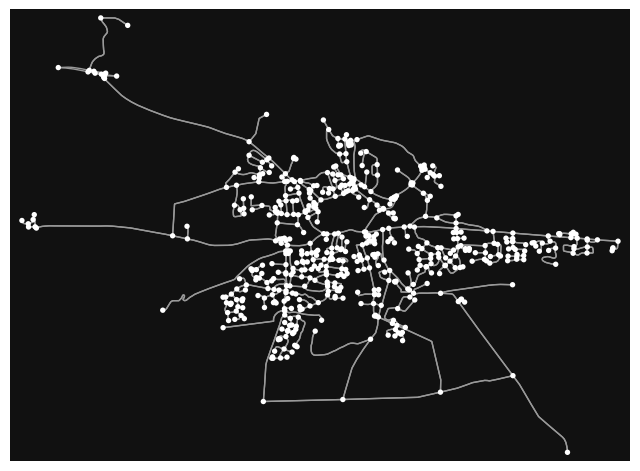

<Figure size 640x480 with 0 Axes>

In [58]:
# Create a graph of drivable street network then plot it. 
# Selected area of intreset e.g., Hexham. 
G = ox.graph_from_place('Hexham, UK', network_type='drive')
fig, ax = ox.plot_graph(G)

# Save the plot. 
plt.savefig('NodeandLinks.png', dpi=600)

In [87]:
# Calculate centrality
# Closeness, output values assigned to edges 
deg_centrality = nx.closeness_centrality(nx.line_graph(G))

# Bteweenness, output values assigned to edges
# Can apply a k factor for an estimation and to reduce run times.  
# deg_centrality = nx.edge_betweenness_centrality(G)

In [88]:
# Create a list of edge centrality values
ev = [deg_centrality[edge + (0,)] for edge in G.edges()]

# Create a GeoDataFrame of the edges
gdf_edges = ox.graph_to_gdfs(G, nodes=False, fill_edge_geometry=True)

# Add the edge centrality values as a new column to the GeoDataFrame
# Change column name dependent on variable 
gdf_edges['closeness'] = ev

In [95]:
# Add degree centrality as edge attribute
# Change name as required
nx.set_edge_attributes(G, values=deg_centrality, name='closeness')

# Save the network model to disk as a shapefile.
ox.save_graph_shapefile(G)

/usr/local/lib/python3.9/dist-packages/osmnx/io.py:87: UserWarning: The `save_graph_shapefile` function is deprecated and will be removed in a future release. Instead, use the `save_graph_geopackage` function to save graphs as GeoPackage files for subsequent GIS analysis.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/osmnx/io.py:114: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)
/usr/local/lib/python3.9/dist-packages/osmnx/io.py:115: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_edges.to_file(filepath_edges, driver="ESRI Shapefile", index=True, encoding=encoding)


In [84]:
# Create a graph of edge centriality  
# Closeness
dge_centrality = nx.closeness_centrality(nx.line_graph(G))
# Or betweenness 
#dge_centrality = nx.betweenness_centrality(nx.line_graph(G))

# create a list of edge centrality values
ev = [dge_centrality[edge + (0,)] for edge in G.edges()]

# create a GeoDataFrame of the edges
gdf_edges = ox.graph_to_gdfs(G, nodes=False, fill_edge_geometry=True)

# add the edge centrality values as a new column to the GeoDataFrame
gdf_edges['betweenness'] = ev

# create a color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno_r)
ec = [cmap.to_rgba(cl) for cl in ev]

<ipython-input-85-d4f4674dbbca>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('inferno_r')


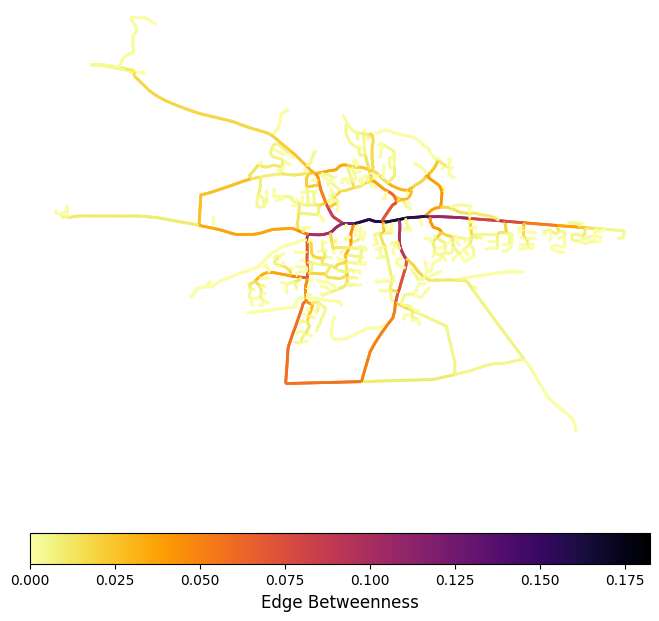

In [85]:
# Plot the graph 
cmap = plt.cm.get_cmap('inferno_r')
norm=colors.Normalize(vmin=min(ev), vmax=max(ev))
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

fig, ax = ox.plot_graph(G, bgcolor='white', node_size=0, edge_color=ec, edge_linewidth=2, edge_alpha=1, show=False)
cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='horizontal')
cb.set_label('Edge Betweenness', fontsize = 12)
plt.savefig('Betweenness_N.png', dpi=600)

In [102]:
# Calcukate degree of node centrality
deg_centrality = nx.degree_centrality(G)

In [103]:
# Add degree centrality as node attribute
nx.set_node_attributes(G, values=deg_centrality, name='centrality') 

# Save the network model to disk as a shapefile.
ox.save_graph_shapefile(G)

/usr/local/lib/python3.9/dist-packages/osmnx/io.py:87: UserWarning: The `save_graph_shapefile` function is deprecated and will be removed in a future release. Instead, use the `save_graph_geopackage` function to save graphs as GeoPackage files for subsequent GIS analysis.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/osmnx/io.py:114: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)
/usr/local/lib/python3.9/dist-packages/osmnx/io.py:115: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_edges.to_file(filepath_edges, driver="ESRI Shapefile", index=True, encoding=encoding)


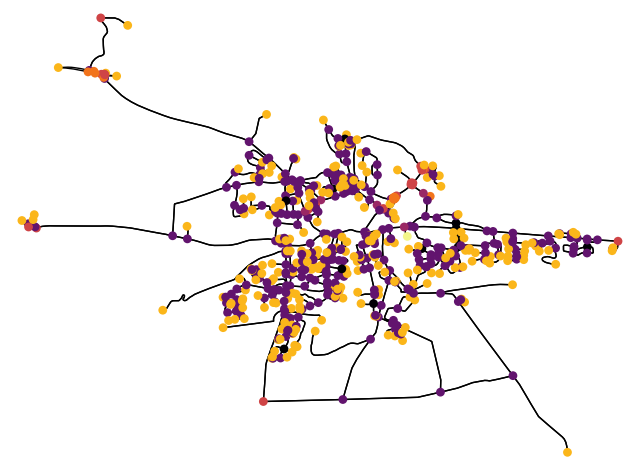

In [104]:
# Plot a colored node graph. 
ev = [val_map.get(node, 0.25) for node in G.nodes()]
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno_r)
ec = [cmap.to_rgba(cl) for cl in ev]

# Color the nodes in the original graph by centrality
fig, ax = ox.plot_graph(G, bgcolor='white', 
                        node_size=40, node_color=ec,
                        edge_color="black", edge_linewidth=1, edge_alpha=1)

In [105]:
 # Assign node values to edges, can be done for min, max or mean. 
# Loop through the edges in the graph
for u, v, data in G.edges(data=True):
    # Get the closeness centrality values for the connecting nodes
    u_centrality = val_map.get(u, 0.25)
    v_centrality = val_map.get(v, 0.25)
    # Set the edge attribute to the maximum of the two centrality values
    data['edge_centrality'] = min(u_centrality, v_centrality)

# Normalize the edge centrality values for colormap
norm = colors.Normalize(vmin=0, vmax=max(data['edge_centrality'] for _, _, data in G.edges(data=True)))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno_r)
ec = [cmap.to_rgba(data['edge_centrality']) for _, _, data in G.edges(data=True)]

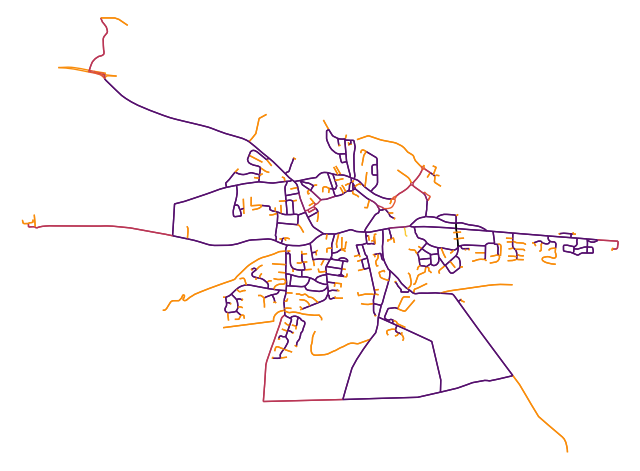

In [106]:
# Calculate the centrality for each node in the graph
val_map = nx.degree_centrality(G)

# Loop through the edges in the graph
# Can apply min, mean or max value of node to adjoinging edges. 
for u, v, data in G.edges(data=True):
    # Get the closeness centrality values for the connecting nodes
    u_centrality = val_map.get(u, 0.25)
    v_centrality = val_map.get(v, 0.25)
    # Set the edge attribute to the maximum of the two centrality values
    data['edge_centrality'] = min(u_centrality, v_centrality)

# Normalize the edge centrality values for colormap
norm = colors.Normalize(vmin=0, vmax=max(data['edge_centrality'] for _, _, data in G.edges(data=True)))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno_r)
ec = [cmap.to_rgba(data['edge_centrality']) for _, _, data in G.edges(data=True)]

# Plot the graph with colored edges
fig, ax = ox.plot_graph(G, bgcolor='white', 
                        node_size=0, node_color='white',
                        edge_color=ec, edge_linewidth=1, edge_alpha=1)

# Traffic Camera Image Download

In [ ]:
# An account with NE Travel is required to access this data.
# Replace username and password with account log in details. 
# Request camera static data (e.g., location description and ID) 
r = requests.get('https://www.netraveldata.co.uk/api/v2/cctv/static',
            auth = HTTPBasicAuth('username', 'password'))

j = r.json()

# Convert data into a dataframe format. 
df = pd.DataFrame.from_dict(j)
df.head(2)

In [ ]:
# Download the data. 
df.to_csv(r'Traffic_Cameras.csv')

In [ ]:
# Request camera images. 
# Download images from the provided links. 
r = requests.get('https://www.netraveldata.co.uk/api/v2/cctv/dynamic',
            auth = HTTPBasicAuth('userneame', 'password'))
j = r.json()
j